# Problem 2 - Multivariate Regression
Housing Price Prediction Problem. Suppose ‘Mr. X’ is planning to buy a house in Delhi and wants to predict the
price of the house given some features like number of bedrooms, number of bathrooms, area of the house, etc.
The file ’prob2data.csv’ contains a training set of housing prices in Delhi.

# Imports

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Part 1
Read the excel file using pandas and perform data cleaning. Remove 1
st column ’id’ which may not be
necessary here. Perform mean normalization of features.

# Reading data

In [7]:
data = pd.read_csv("prob2data.csv")
data.head()

,id,price,bedrooms,bathrooms,sqft_living,floors,yr_built
0,7129300520,221900.0,3,1.00,1180,1.0,1955
1,6414100192,538000.0,3,2.25,2570,2.0,1951
2,5631500400,180000.0,2,1.00,770,1.0,1933
3,2487200875,604000.0,4,3.00,1960,1.0,1965
4,1954400510,510000.0,3,2.00,1680,1.0,1987


# Normalization and editing
Removing column 'id' and performing mean normalization

In [8]:
data = data.drop('id',axis=1)
y = np.array(data['price'])
X = data.drop('price',axis = 1).values
n,m = X.shape

means = np.array([X[:,i].mean() for i in range(m)])
maxes = np.array([X[:,i].max() for i in range(m)])
mins = np.array([X[:,i].min() for i in range(m)])
for i in range(m):
    X[:,i] = (X[:,i] - means[i])/(maxes[i]-mins[i])
X = np.concatenate([np.ones((n,1)),X],axis=1)

# Part 2
Write a Python code to perform multivariate regression to predict the house price. Consider all 5 columns
(‘bedrooms’,...,‘yr built’) as features. Implement batch gradient descent for optimization of weights.

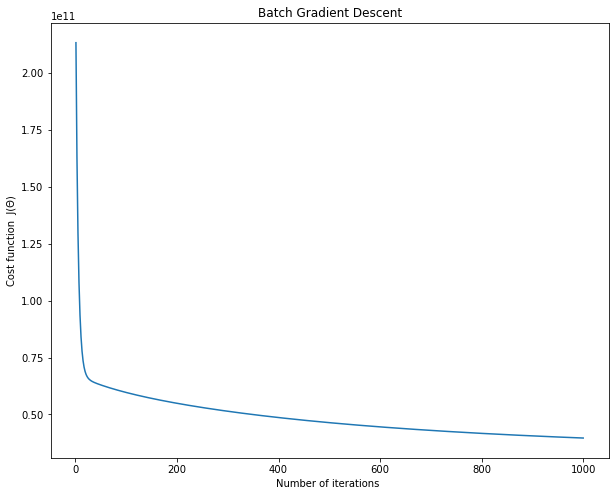

In [9]:

def cost_function(X,y,w):
    m = y.size
    h = np.matmul(X,w)
    J = np.sum( ( h - y).dot(h-y) )/(2*m)
    grad = (np.matmul(h-y,X) )/m
    return J,grad

n,m = X.shape
w = np.random.random((m))
alpha = 0.1
N = 1000
J = []
I=[]

for i in range(N):
    j,grad = cost_function(X,y,w)
    if i<N-1:
        w = w - alpha*grad
    J.append(j)
    I.append(i+1)


plt.figure()
plt.plot(I,J)
plt.xlabel("Number of iterations ")
plt.ylabel("Cost function  J(Θ)")
plt.title("Batch Gradient Descent")
plt.savefig("p2.png");

# Part 3
Predict the house price using the model, for 4 bedrooms, 2.5 bathrooms, 2570 sq. feet area, 2 floors, 2005 yr.
built, and state the difference between the model prediction and actual value (Rs. 719000). Show in % error.


In [10]:
x_data = np.array([4, 2.5, 2570, 2, 2005])
#Normalizing data and get corresponding X for test data
x_data = (x_data-means)/(maxes-mins)
x_data = np.concatenate([np.ones(1),x_data],axis=0)
# Getting prediction of price
actual_price = 719000
predicted_price = np.matmul(w,x_data)
print(predicted_price)
#Calculating relative error
err = 100*abs(1-predicted_price/actual_price)
print("% error = ",round(err,2),"%")

601009.6646922075
% error =  16.41 %
